# Analiza podatkov mang

Tukaj bom analiziral podatke, ki sem jih pridobil iz spletne strani https://myanimelist.net/topmanga.php. Za vsako mango sem našel: rank, naslov, ocena in število delov. Najprej prikažimo tabelo vseh 1500 najdenih mang.

In [229]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

podatki_obdelani = 'csv_datoteke'
csv1 = 'manga_info.csv'
pot1 = os.path.join(podatki_obdelani, csv1)

pd.set_option("display.max_rows", 12)

mange1 = pd.read_csv(pot1)
mange1.index += 1
mange1.iloc[::,1:]

,naslov,ocena,deli
1,Berserk,9.47,Ni končana
2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.31,24
3,Vagabond,9.26,37
4,One Piece,9.22,Ni končana
5,Monster,9.16,18
...,...,...,...
1496,Running on Empty,7.75,2
1497,Amanchu!,7.75,17
1498,Not Simple,7.75,1
1499,Yakusoku Siren,7.75,Ni končana


Tukaj lahko vidimo še prikaz frekvenčne porazdelitve ocen, da lahko res dobimo občutek, kako dobre so najbolje ocenjene mange.

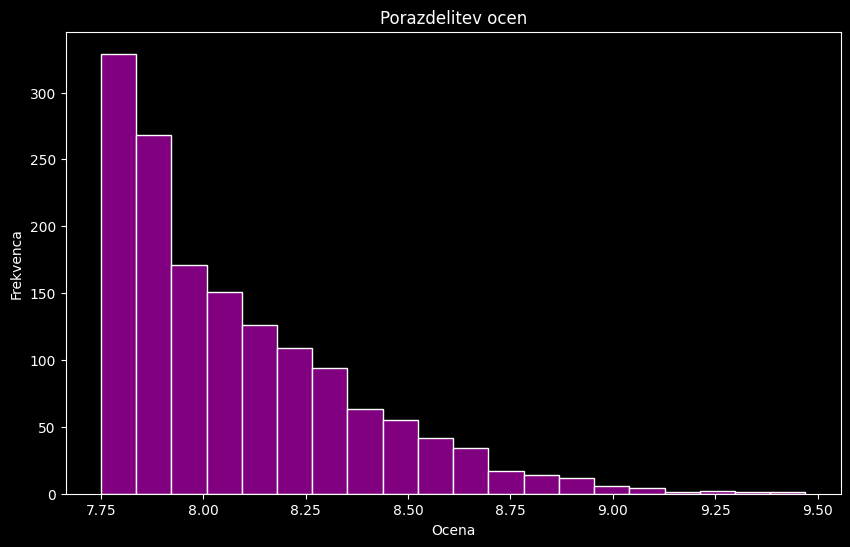

In [224]:
plt.figure(figsize=(10, 6))
mange1['ocena'].hist(bins=20, color='purple', edgecolor='white')
plt.title('Porazdelitev ocen')
plt.xlabel('Ocena')
plt.ylabel('Frekvenca')
plt.grid(False)
plt.style.use('dark_background')
plt.show()

Poseben užitek je branje mange, ki sproti izhaja, saj se lahko cel teden/mesec veseliš ponovne izdaje. V ta namen lahko spodaj vidimo mange, ki še niso dokončane.

In [231]:
ne_končane = mange1[mange1['deli'] == 'Ni končana']
ne_končane.reset_index(inplace=True, drop=True)
ne_končane.index += 1
ne_končane

,rank,naslov,ocena,deli
1,1,Berserk,9.47,Ni končana
2,4,One Piece,9.22,Ni končana
3,7,Vinland Saga,9.08,Ni končana
4,12,Grand Blue,9.03,Ni končana
5,13,Kingdom,9.01,Ni končana
...,...,...,...,...
448,1480,Tensura Nikki: Tensei shitara Slime Datta Ken,7.75,Ni končana
449,1482,"No, Youna.",7.75,Ni končana
450,1484,Kaijuu 8-gou,7.75,Ni končana
451,1499,Yakusoku Siren,7.75,Ni končana


Spodnji graf prikazuje frekvenčno porazdelitev števila delov

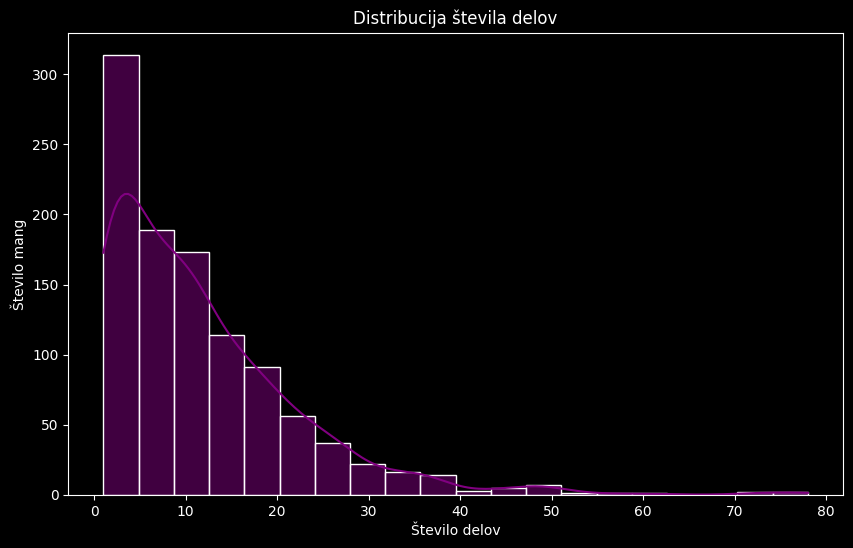

In [235]:
mange1['deli'] = mange1['deli'].replace('Ni končana', pd.NA)
mange1['deli'] = pd.to_numeric(mange1['deli'])

plt.figure(figsize=(10, 6))
sns.histplot(mange1['deli'].dropna(), bins=20, kde=True, color='purple')
plt.title('Distribucija števila delov')
plt.xlabel('Število delov')
plt.ylabel('Število mang')
plt.show()

in pa še porazdelitev ocen v odvisnosti od števila delov mange

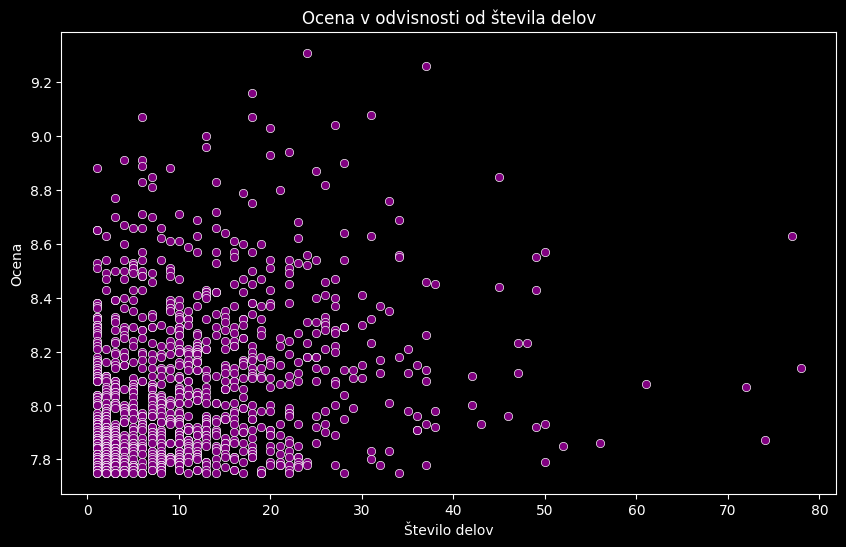

In [221]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='deli', y='ocena', data=mange1, color='purple')
plt.title('Ocena v odvisnosti od števila delov')
plt.xlabel('Število delov')
plt.ylabel('Ocena')
plt.show()

## Podrobnejša analiza najboljših 100 mang

100 najboljših mang sem še dodatno analiziral. Za vsako sem poiskal atribute: popularnost, žanri in revija:<br> <br>
* **Popularnost:** številka, ki pomeni koliko ljudi zdaj bere to mango, kako aktiven je *'fanbase'*. Številčenje je enako kot *rank*, popularnost 1. pomeni, da je ta manga najbolj popularna<br><br>
* **Žanri:** seznam žanrov v katere spada manga npr. *Action, Drama, Sci-Fi...*<br><br>
* **Revija:** string z imenom revije, ki objavlja to mango, podobno kot za knjige založba

Najprej poglejmo tabelo najboljših 100 mang z vsemi podatki.

In [78]:
csv2 = 'manga_info2.csv'
pot2 = os.path.join(podatki_obdelani, csv2)
mange2 = pd.read_csv(pot2)
mange2.index += 1
mange2

,rank,naslov,ocena,deli,popularnost,žanri,revija
1,1,Berserk,9.47,Ni končana,1,"['Action', 'Adventure', 'Award Winning', 'Dram...",Young Animal
2,2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.31,24,24,"['Action', 'Adventure', 'Mystery', 'Supernatur...",Ultra Jump
3,3,Vagabond,9.26,37,14,"['Action', 'Adventure', 'Award Winning']",Morning
4,4,One Piece,9.22,Ni končana,4,"['Action', 'Adventure', 'Fantasy']",Shounen Jump (Weekly)
5,5,Monster,9.16,18,29,"['Award Winning', 'Drama', 'Mystery']",Big Comic Original
...,...,...,...,...,...,...,...
96,96,19 Tian,8.60,Ni končana,2003,"['Boys Love', 'Comedy']",Nismo našli revije
97,97,Skip to Loafer,8.59,Ni končana,447,"['Award Winning', 'Drama']",Afternoon
98,98,Ao Ashi,8.59,Ni končana,573,"['Award Winning', 'Sports']",Big Comic Spirits
99,99,Shigatsu wa Kimi no Uso,8.59,11,192,"['Award Winning', 'Drama', 'Romance']",Shounen Magazine (Monthly)


Ampak za mango ni dovolj, da je samo dobro ocenjena... Velik del branja mang je tudi kultura, ki branje obkroža. Pogovori s prijatelji, čakanje na novo izdajo in skupno teoriziranje, kaj le se bo prihodnjič zgodilo. Zato rad berem mange, ki so trenutno popularne, da jih lahko uživam z drugimi. V naslednji tabeli bom prvih 100 najbolje ocenjenih mang razvrstil po padajoči popularnosti.

In [238]:
mange2.sort_values(by=['popularnost'])

,rank,naslov,ocena,deli,popularnost,žanri,revija
1,1,Berserk,9.47,Ni končana,1,"['Action', 'Adventure', 'Award Winning', 'Dram...",Young Animal
55,55,Chainsaw Man,8.71,Ni končana,3,"['Action', 'Award Winning', 'Supernatural']",Shounen Jump+
4,4,One Piece,9.22,Ni končana,4,"['Action', 'Adventure', 'Fantasy']",Shounen Jump (Weekly)
64,64,Solo Leveling,8.67,Ni končana,5,"['Action', 'Adventure', 'Fantasy']",KakaoPage
50,50,One Punch-Man,8.73,Ni končana,7,"['Action', 'Comedy']",Tonari no Young Jump
...,...,...,...,...,...,...,...
96,96,19 Tian,8.60,Ni končana,2003,"['Boys Love', 'Comedy']",Nismo našli revije
72,72,Kimi no Suizou wo Tabetai,8.65,1,2523,"['Drama', 'Romance']",Nismo našli revije
20,20,Mo Dao Zu Shi,8.91,4,2703,"['Action', 'Adventure', 'Boys Love', 'Mystery'...",Nismo našli revije
9,9,Guimi Zhi Zhu,9.07,18,5030,"['Action', 'Mystery', 'Supernatural', 'Suspense']",Nismo našli revije


Če ima bralec najljubši žaner mange (moj je naprimer *'Action'*), lahko z naslednjo kodo pridobi seznam mang, ki med prvimi stotimi spadajo v željeno kategorijo. To lahko bralcu hitro poda idejo za naslednje branje.

In [79]:
data = []
for index, vrstica in mange2.iterrows():
    if 'Action' in vrstica['žanri']:
        data.append(vrstica)
mange3 = pd.DataFrame(data=data, index=range(1, len(data) + 1))
mange3

,rank,naslov,ocena,deli,popularnost,žanri,revija
1,1,Berserk,9.47,Ni končana,1,"['Action', 'Adventure', 'Award Winning', 'Dram...",Young Animal
2,2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.31,24,24,"['Action', 'Adventure', 'Mystery', 'Supernatur...",Ultra Jump
3,3,Vagabond,9.26,37,14,"['Action', 'Adventure', 'Award Winning']",Morning
4,4,One Piece,9.22,Ni končana,4,"['Action', 'Adventure', 'Fantasy']",Shounen Jump (Weekly)
5,7,Vinland Saga,9.08,Ni končana,18,"['Action', 'Adventure', 'Award Winning', 'Drama']",Afternoon
...,...,...,...,...,...,...,...
34,86,Pluto,8.62,8,102,"['Action', 'Award Winning', 'Mystery', 'Sci-Fi...",Big Comic Original
35,87,Shinyaku Toaru Majutsu no Index,8.62,23,1256,"['Action', 'Comedy', 'Fantasy', 'Sci-Fi', 'Sup...",Nismo našli revije
36,91,Mob Psycho 100,8.61,16,109,"['Action', 'Award Winning', 'Comedy', 'Superna...",MangaONE
37,92,Ginga Eiyuu Densetsu,8.61,10,1989,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",Nismo našli revije


Res vešči oboževalci mang, se morda želijo celo naročiti na kakšno revijo. Da tudi izbor revije kar se da olajšamo, lahko spodaj vidimo 10 revij, ki je objavilo največ mang, ki spadajo v najboljših 100.

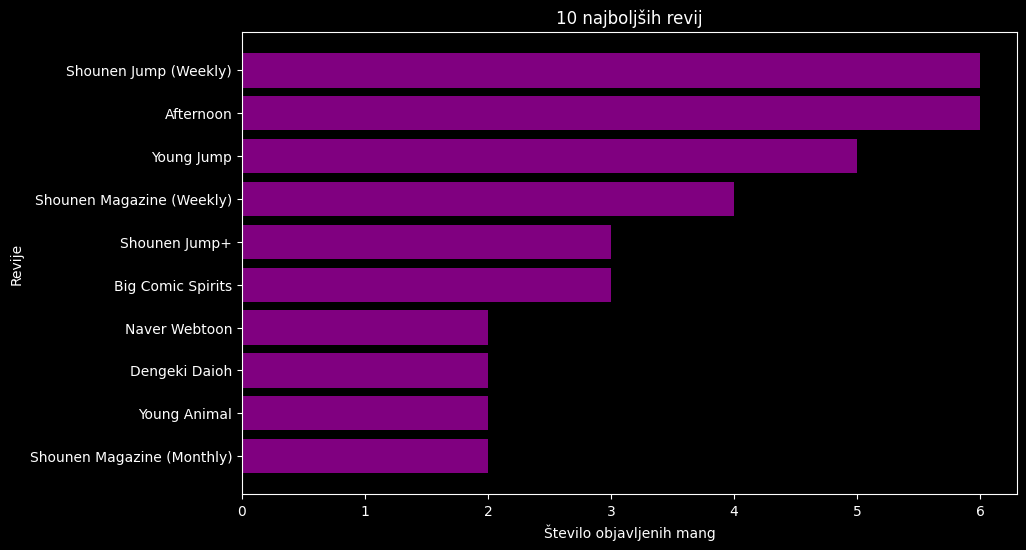

In [242]:
#Preštejemo število mang v vsaki reviji
naj_revije = mange2['revija'].value_counts().reset_index().rename(columns={"index": "revija", 0: "count" })

#Izpustimo prvo, ker za največ mang, dobimo "Nismo našli revije", ker niso vse izdane v revijah
naj_par = naj_revije[1:11]

plt.figure(figsize=(10, 6))
plt.barh(naj_par['revija'], naj_par['count'], color='purple')
plt.title('10 najboljših revij')
plt.xlabel('Število objavljenih mang')
plt.ylabel('Revije')
plt.gca().invert_yaxis()
plt.show()

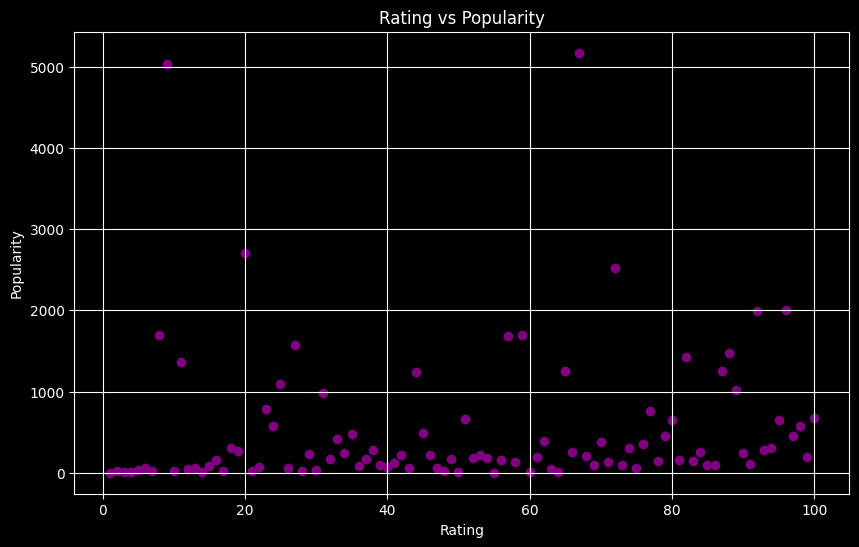

In [243]:
plt.figure(figsize=(10, 6))
plt.scatter(mange2['rank'], mange2['popularnost'], alpha=1, color='purple')
plt.title('Rating vs Popularity')
plt.xlabel('Rating')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()